In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.layers import *
from keras.models import *

In [2]:
train_path='Dataset/Train'
Val_path='Dataset/Val'

In [3]:
# CNN Based Model

model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [5]:
# Train From Scratch

train_datagen=image.ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset=image.ImageDataGenerator(rescale=1/255,shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
train_generator=train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size=(224,224),
    batch_size=25,
    class_mode='binary'
)

Found 302 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator=test_dataset.flow_from_directory(
    'Dataset/Val',
    target_size=(224,224),
    batch_size=25,
    class_mode='binary'
)

Found 90 images belonging to 2 classes.


In [9]:
hist=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 13s 620ms/step - loss: 1.3903 - accuracy: 0.5550 - val_loss: 0.6859 - val_accuracy: 0.4800
Epoch 2/10
8/8 [==============================] - 4s 517ms/step - loss: 0.6847 - accuracy: 0.5480 - val_loss: 0.6589 - val_accuracy: 0.4800
Epoch 3/10
8/8 [==============================] - 4s 533ms/step - loss: 0.4601 - accuracy: 0.7850 - val_loss: 0.3990 - val_accuracy: 0.8400
Epoch 4/10
8/8 [==============================] - 4s 481ms/step - loss: 0.4686 - accuracy: 0.8249 - val_loss: 0.3831 - val_accuracy: 0.9800
Epoch 5/10
8/8 [==============================] - 4s 540ms/step - loss: 0.4614 - accuracy: 0.8418 - val_loss: 0.3444 - val_accuracy: 0.9200
Epoch 6/10
8/8 [==============================] - 4s 548ms/step - loss: 0.5804 - accuracy: 0.7062 - val_loss: 0.6000 - val_accuracy: 0.9200
Epoch 7/10
8/8 [==============================] - 4s 495ms/step - loss: 0.4400 - accuracy: 0.8588 - val_loss: 0.2574 - val_accuracy: 0.9200
Epoch 8/10
8/8 [===

In [10]:
model.save('model.h5')

In [15]:
model.evaluate(train_generator)

13/13 [==============================] - 4s 308ms/step - loss: 0.2563 - accuracy: 0.9404


[0.25634923577308655, 0.940397322177887]

In [16]:
model.evaluate(validation_generator)

4/4 [==============================] - 2s 410ms/step - loss: 0.2291 - accuracy: 0.9778


[0.2291499525308609, 0.9777777791023254]

In [25]:
from keras.models import load_model
import seaborn as sns
import os

In [26]:
model=load_model('model.h5')

In [27]:
y_actual=[]
y_test=[]

In [28]:
for i in os.listdir('Dataset/Val/Normal/'):
    img=image.load_img('Dataset/Val/Normal/'+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict(img)
    if(p[0,0]<0.5):
        y_test.append(0)
    else:
        y_test.append(1)
#     y_test.append(p[0,0])
    y_actual.append(1)

1/1 [==============================] - 0s 47ms/step


In [34]:
for i in os.listdir('Dataset/Val/Covid/'):
    img=image.load_img('Dataset/Val/Covid/'+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict(img)
    if(p[0,0]<0.5):
        y_test.append(0)
    else:
        y_test.append(1)
#     y_test.append(p[0,0])
    y_actual.append(0)

1/1 [==============================] - 0s 47ms/step


In [35]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm=confusion_matrix(y_actual,y_test)

<Axes: >

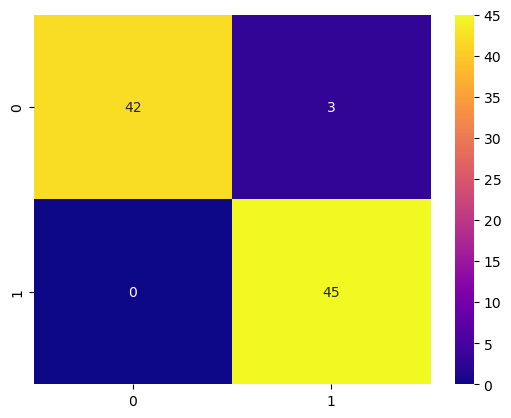

In [38]:
sns.heatmap(cm,cmap='plasma',annot=True)

In [39]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])